## Welcome (This is a example notebook to get started with DES data)


### You would need to enter your credentials again the first time...

### Then It'll be saved in your space

### Click here to get to your home directory [Home](../tree)

In [1]:
%matplotlib inline

In [3]:
import easyaccess as ea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
print(ea.__version__)

1.3.0


In [6]:
# Connecting to the DES DB
connection=ea.connect()

Connecting to DB ** dessci ** ...


In [7]:
# Example query
query='select * from mcarras2.mini_y1a1 where mag_auto_r between 10 and 30 and mag_auto_i between 10 and 30' ##query

### Get data to pandas in one line

In [16]:
DF=connection.query_to_pandas(query) #one line!

In [9]:
# Change pandas displat
pd.set_option('display.max_rows',12) #Display only

In [10]:
# Have a look to the data
DF

,COADD_OBJECTS_ID,RA,DEC,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,TILENAME,MAGERR_DETMODEL_I,FLAGS_I,XCORR_SFD98_G
0,3120938977,9.553670,-52.858189,99.0000,23.3937,23.5964,DES0037-5248,20141118000041_DES0037-5248,0,0.063832
1,3120944503,9.999752,-52.754332,22.4878,21.9532,21.7433,DES0037-5248,20141118000041_DES0037-5248,0,0.056015
2,3120954907,9.114992,-52.555158,25.3244,23.3327,22.3868,DES0037-5248,20141118000041_DES0037-5248,0,0.061165
3,3120936831,8.994403,-52.899365,24.9927,24.5518,23.8233,DES0037-5248,20141118000041_DES0037-5248,0,0.059757
4,3120952757,9.427335,-52.595066,23.6036,23.5077,22.6008,DES0037-5248,20141118000041_DES0037-5248,0,0.055830
5,3120045269,10.008397,-42.256504,24.9008,24.5805,23.9592,DES0041-4206,20141118000041_DES0041-4206,0,0.041641
...,...,...,...,...,...,...,...,...,...,...
13368,3130452163,351.805436,-55.213665,23.2921,22.7168,22.5535,DES2328-5457,20141202000011_DES2328-5457,0,0.036640
13369,3130463106,351.773849,-54.937334,23.9523,22.5014,21.7478,DES2328-5457,20141202000011_DES2328-5457,0,0.034565
13370,3130458607,352.285689,-55.050823,21.1033,20.5093,20.1339,DES2328-5457,20141202000011_DES2328-5457,0,0.043197


In [11]:
# do some plots
X, Y = np.mgrid[20:27:70j, 20:27:70j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([DF.MAG_AUTO_R, DF.MAG_AUTO_I])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

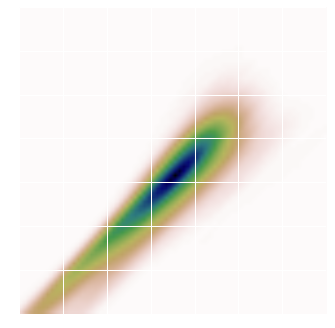

In [12]:
plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[20, 27, 20, 27])

In [31]:
print()

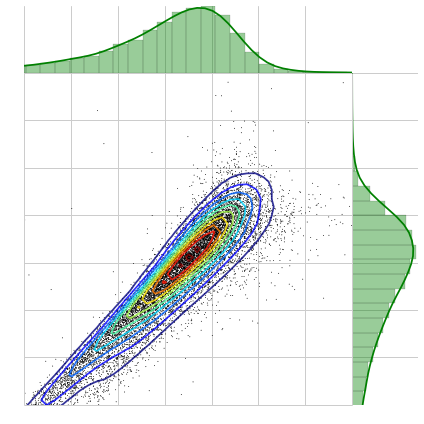

In [13]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
temp=sns.JointGrid(DF.MAG_AUTO_R, DF.MAG_AUTO_I,xlim=[20,27],ylim=[20,27],space=0, size=6)
temp.plot_joint(sns.kdeplot,cmap='jet',alpha=0.8,n_levels=10)
#temp.plot_joint(plt.imshow,np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[20, 27, 20, 27])
temp.plot_joint(plt.scatter, s= .3,color='black')
temp.plot_marginals(sns.distplot, color='green',kde=True)

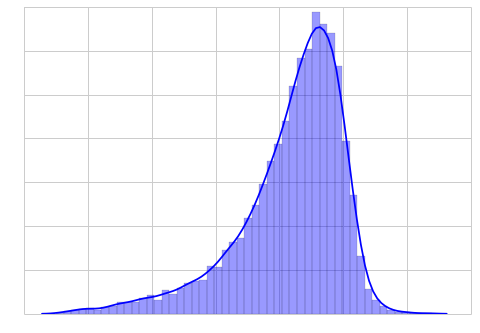

In [17]:
sns.distplot(DF.MAG_AUTO_I[(DF.MAG_AUTO_I>15) & (DF.MAG_AUTO_I<28)],color='blue')

### Since 1.3.0 query_to_pandas can return an iterator! (avoid memory issues)

In [20]:
DF=connection.query_to_pandas(query, prefetch=5000, iterator=True)
DF

In [21]:
DF.next()

,COADD_OBJECTS_ID,RA,DEC,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,TILENAME,MAGERR_DETMODEL_I,FLAGS_I,XCORR_SFD98_G
0,3120938977,9.553670,-52.858189,99.0000,23.3937,23.5964,DES0037-5248,20141118000041_DES0037-5248,0,0.063832
1,3120944503,9.999752,-52.754332,22.4878,21.9532,21.7433,DES0037-5248,20141118000041_DES0037-5248,0,0.056015
2,3120954907,9.114992,-52.555158,25.3244,23.3327,22.3868,DES0037-5248,20141118000041_DES0037-5248,0,0.061165
3,3120936831,8.994403,-52.899365,24.9927,24.5518,23.8233,DES0037-5248,20141118000041_DES0037-5248,0,0.059757
4,3120952757,9.427335,-52.595066,23.6036,23.5077,22.6008,DES0037-5248,20141118000041_DES0037-5248,0,0.055830
5,3120045269,10.008397,-42.256504,24.9008,24.5805,23.9592,DES0041-4206,20141118000041_DES0041-4206,0,0.041641
...,...,...,...,...,...,...,...,...,...,...
4994,3072447876,60.701095,-60.112017,24.4312,24.1457,24.1968,DES0401-5957,20141105000042_DES0401-5957,0,0.066426
4995,3072441712,60.716237,-60.173998,23.7143,22.8221,22.3142,DES0401-5957,20141105000042_DES0401-5957,3,0.061461
4996,3072483360,60.575693,-59.785141,25.4950,25.0365,24.4309,DES0401-5957,20141105000042_DES0401-5957,0,0.064092


In [22]:
DF.next()

,COADD_OBJECTS_ID,RA,DEC,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,TILENAME,MAGERR_DETMODEL_I,FLAGS_I,XCORR_SFD98_G
0,3072879245,59.149460,-40.076769,24.4472,24.2912,23.9567,DES0357-3957,20141105000042_DES0357-3957,0,0.038233
1,3072915159,58.978412,-39.694625,24.6694,22.5159,21.5851,DES0357-3957,20141105000042_DES0357-3957,0,0.033750
2,3072912804,59.696447,-39.724721,23.5126,24.0006,23.7241,DES0357-3957,20141105000042_DES0357-3957,0,0.028415
3,3073213545,60.048173,-42.256537,23.0425,22.4891,21.8430,DES0401-4206,20141105000042_DES0401-4206,0,0.024414
4,3073221188,60.026761,-42.206840,23.8211,22.6393,22.2903,DES0401-4206,20141105000042_DES0401-4206,3,0.024488
5,3073228530,60.020613,-42.166291,25.2956,24.7867,23.9866,DES0401-4206,20141105000042_DES0401-4206,0,0.026044
...,...,...,...,...,...,...,...,...,...,...
4994,3031640315,92.117698,-60.202418,23.9438,23.6391,23.4671,DES0607-5957,20141031000031_DES0607-5957,0,0.170306
4995,3031662616,92.072317,-59.909455,25.7267,24.7890,25.0778,DES0607-5957,20141031000031_DES0607-5957,0,0.130073
4996,3031671658,91.268239,-59.808653,18.4179,17.7272,17.5441,DES0607-5957,20141031000031_DES0607-5957,0,0.151079


In [24]:
DF.next()

,COADD_OBJECTS_ID,RA,DEC,MAG_AUTO_G,MAG_AUTO_R,MAG_AUTO_I,TILENAME,MAGERR_DETMODEL_I,FLAGS_I,XCORR_SFD98_G
0,3031818297,91.941868,-55.500526,24.2774,23.1425,22.5941,DES0608-5540,20141031000031_DES0608-5540,0,0.227507
1,3031805421,92.294170,-55.665258,23.3376,23.2980,23.2652,DES0608-5540,20141031000031_DES0608-5540,0,0.203723
2,3031904650,91.639783,-48.647433,24.9551,24.3347,24.2368,DES0607-4831,20141031000031_DES0607-4831,0,0.145633
3,3031890704,91.408915,-48.864445,24.8661,22.8095,21.8804,DES0607-4831,20141031000031_DES0607-4831,0,0.136519
4,3031920656,91.569291,-48.409500,26.4439,24.9923,24.2001,DES0607-4831,20141031000031_DES0607-4831,0,0.168157
5,3031919288,91.425436,-48.430647,24.3908,23.1633,22.2368,DES0607-4831,20141031000031_DES0607-4831,3,0.170047
...,...,...,...,...,...,...,...,...,...,...
3368,3130452163,351.805436,-55.213665,23.2921,22.7168,22.5535,DES2328-5457,20141202000011_DES2328-5457,0,0.036640
3369,3130463106,351.773849,-54.937334,23.9523,22.5014,21.7478,DES2328-5457,20141202000011_DES2328-5457,0,0.034565
3370,3130458607,352.285689,-55.050823,21.1033,20.5093,20.1339,DES2328-5457,20141202000011_DES2328-5457,0,0.043197


In [26]:
DF.next()

StopIteration: No more data in the DB

### Can save query directly to file (fits, csv, hdf5)

In [31]:
# write data to a file
connection.query_and_save(query,'mytable.csv') #same formatting




 Written 13374 rows to mytable.csv in 0.60 seconds and 2 trips




### Upload  (or append) a pandas DataFrame into DB

In [63]:
# Create a DF first
N=300000
DF = pd.DataFrame(np.random.rand(N).reshape((N/3, 3)),columns=['RA','DEC','VAL'])
DF

,RA,DEC,VAL
0,0.639897,0.708390,0.781447
1,0.198987,0.462451,0.345241
2,0.630184,0.102047,0.241278
3,0.892800,0.163618,0.166124
4,0.656149,0.903438,0.242735
5,0.761074,0.850463,0.123226
...,...,...,...
99994,0.209424,0.426245,0.416143
99995,0.163051,0.793751,0.646299
99996,0.458087,0.607685,0.884564


In [70]:
## Upload to DB
connection.pandas_to_db(DF, tablename='Pandas_test')


 [Iter: 1] Inserted 100000 rows and 3 columns into table PANDAS_TEST in 0.39 seconds


True

In [71]:
connection.pandas_to_db(DF, tablename='Pandas_test', append=True)


 [Iter: 1] Inserted 100000 rows and 3 columns into table PANDAS_TEST in 0.34 seconds


True

In [72]:
connection.query_and_print('select count(*) from PANDAS_TEST')



1 rows in 0.06 seconds

   COUNT(*)
1    200000



In [73]:
connection.query_and_print('select * from PANDAS_TEST where rownum < 6')



5 rows in 0.02 seconds

         RA       DEC       VAL
1  0.639897  0.708390  0.781447
2  0.198987  0.462451  0.345241
3  0.630184  0.102047  0.241278
4  0.892800  0.163618  0.166124
5  0.656149  0.903438  0.242735



### Drop tables

In [77]:
connection.drop_table('Pandas_test')


 Couldn't drop 'PANDAS_TEST' (doesn't exist).


### Load (or append) tables directly from file (optionally in chunks)

In [86]:
# Save a file
DF.to_csv('mytable.csv',sep=',',index=False)

In [87]:
connection.load_table('mytable.csv', name='My_super_table')


 [Iter: 1] Inserted 100000 rows and 3 columns into table MY_SUPER_TABLE in 0.35 seconds

 ** Table MY_SUPER_TABLE loaded successfully with 100000 rows.

 You may want to refresh the metadata so your new table appears during
 autocompletion
 DESDB ~> refresh_metadata_cache;

 To make this table public run:
 DESDB ~> grant select on MY_SUPER_TABLE to DES_READER; 



True

In [90]:
connection.append_table('mytable.csv', name='My_super_table', chunksize=30000)


 [Iter: 1] Inserted 30000 rows and 3 columns into table MY_SUPER_TABLE in 0.11 seconds

 [Iter: 2] Inserted 30000 rows and 3 columns into table MY_SUPER_TABLE in 0.14 seconds

 [Iter: 3] Inserted 30000 rows and 3 columns into table MY_SUPER_TABLE in 0.16 seconds

 [Iter: 4] Inserted 10000 rows and 3 columns into table MY_SUPER_TABLE in 0.04 seconds

 ** Table MY_SUPER_TABLE appended successfully with 100000 rows.


True

In [91]:
connection.query_and_print('select count(*) from MY_SUPER_TABLE')



1 rows in 0.02 seconds

   COUNT(*)
1    200000



In [92]:
connection.drop_table('MY_SUPER_TABLE')

### In-query python functions!

In [93]:
# load module
connection.ea_import('wrapped as Y')

The following functions are accessible by easyaccess
i.e., they are wrapped with @toeasyaccess

    Y.my_func()
    Y.my_sum()


True

In [94]:
connection.do_help_function('Y.my_sum')


Help for Y.my_sum:

Y.my_sum(a, b, min_value=None, max_value=None)

    Sum two colums, if max_values is defined the values are clipped
    to that value
    


In [113]:
query2 = 'SELECT COADD_OBJECTS_ID, /*p: Y.my_sum(RA,DEC) as my_col*/ from mcarras2.MINI_Y1A1 where rownum < 10'

In [114]:
df = connection.query_to_pandas(query2)
df

,COADD_OBJECTS_ID,MY_COL
0,3120938977,62.411859
1,3120944503,62.754084
2,3120954907,61.670150
3,3120936831,61.893768
4,3120952757,62.022401
5,3120045269,52.264901
6,3120047663,57.268176
7,3120047896,57.737270
8,3120055956,57.298902


# Check easyaccess tutorial [here](http://deslogin.cosmology.illinois.edu/~mcarras2/DESDM.html#/) and confluence page [here](https://opensource.ncsa.illinois.edu/confluence/display/DESDM/EasyAccess)